# USA Housing Price Prediction

This project applies linear regression to predict housing prices based on socioeconomic and demographic features. It includes exploratory data analysis, correlation inspection, model training, and visual evaluation of predictions.

## 📌 Project Overview

- **Dataset**: `USA_Housing.csv`  
- **Target variable**: `Price`  
- **Features**:  
  - Avg. Area Income  
  - Avg. Area House Age  
  - Avg. Area Number of Rooms  
  - Avg. Area Number of Bedrooms  
  - Area Population

## 🔍 Workflow

1. **Data Loading & Inspection**  
   Initial exploration using `.head()`, `.info()`, and `.describe()`

2. **Exploratory Data Analysis (EDA)**  
   - Distribution of housing prices with mean/median
   - Correlation heatmap of numerical features

3. **Modeling**  
   - Train/test split (60/40)
   - Linear regression model fitting
   - Coefficient interpretation

4. **Evaluation**  
   - Scatterplot of predicted vs actual prices
   - Error visualization using color mapping

## 📦 Technologies Used

- Python
- Pandas, NumPy
- Seaborn, Matplotlib
- scikit-learn

## ▶️ To Run

```bash
pip install pandas numpy matplotlib seaborn scikit-learn
```

Run the script or Jupyter notebook in your Python environment.


In [120]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [121]:
# Load dataset
df = pd.read_csv('USA_Housing.csv')

In [122]:
# Display basic dataset info
df.head() # Show first few rows

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [123]:
df.info() # Dataset structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [124]:
df.describe()  # Summary statistics

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [125]:
df.columns  # Column names

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [126]:
df['Price'].describe()  # Shows min, max, mean, etc.

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

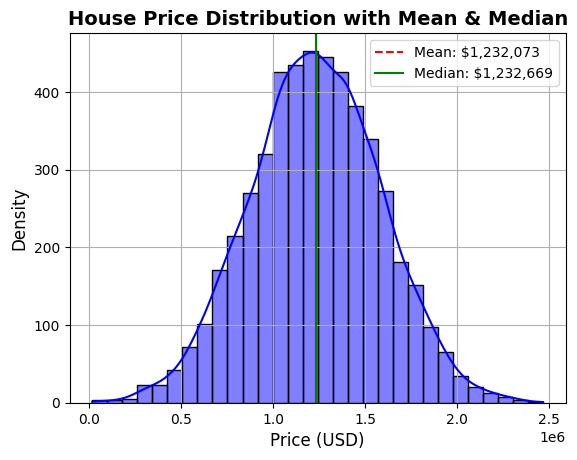

In [127]:
mean_price = df['Price'].mean()
median_price = df['Price'].median()

sns.histplot(x=df['Price'], kde=True, bins=30, color="blue", edgecolor='black')
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:,.0f}')
plt.axvline(median_price, color='green', linestyle='-', label=f'Median: ${median_price:,.0f}')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('House Price Distribution with Mean & Median', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

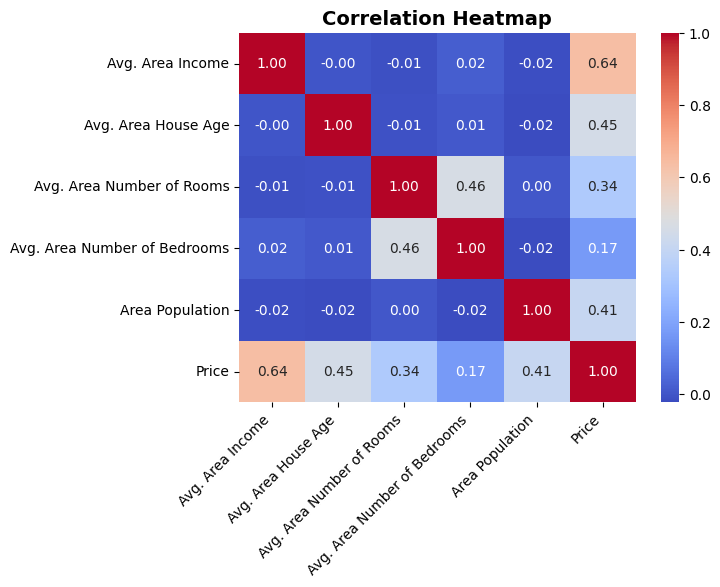

In [128]:
heatmap = sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')  # Adjusts labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)  # Keeps y-axis readable
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

In [129]:
# Define features (X) and target variable (y)
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [130]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [131]:
# Initialize and train the Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [132]:
# Model parameters
print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)

Intercept: -2640159.796852963
Coefficients: [2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [133]:
# Create a DataFrame for coefficients
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
print(cdf)

                                      Coeff
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420


In [134]:
# Predictions on test set
predictions = lm.predict(X_test)

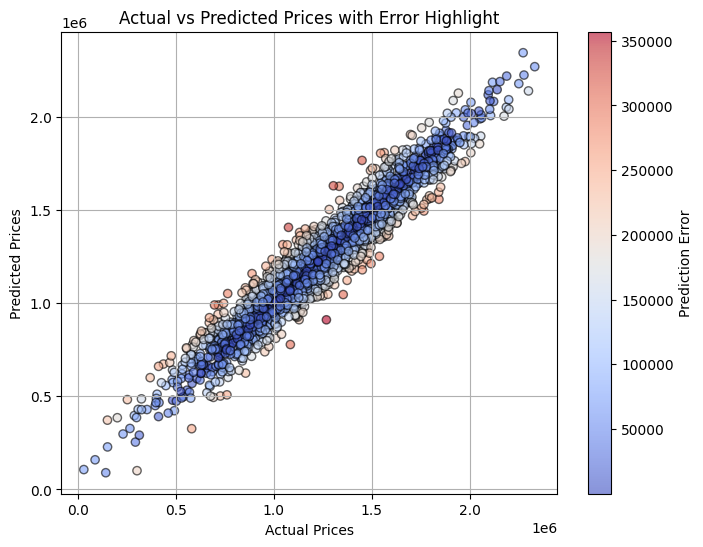

In [135]:
colors = np.abs(y_test - predictions)  # Color based on prediction error
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, c=colors, cmap='coolwarm', edgecolors='black', alpha=0.6)
plt.colorbar(label="Prediction Error")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices with Error Highlight")
plt.grid(True)
plt.show()
